In [4]:
# GeoPandas 모듈 설치하기 - 처음 한 번만
!pip3 install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 33.4MB/s 
     |████████████████████████████████| 10.1MB 25.7MB/s 


In [0]:
#설치된 패키지 모듈 리스트 확인
#!pip list

In [0]:
# 공간데이터를 다루기 위한 geopandas 라이브러리 적용
import geopandas as gpd

In [6]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [7]:
# 데이터 경로 파일 확인
!ls /gdrive/My\ Drive/Colab\ Notebooks/data

library_location.csv  pop__student_seoul.txt  SGIS_SGG.prj  SGIS_SGG.shp
park.csv	      SGIS_SGG.dbf	      SGIS_SGG.qpj  SGIS_SGG.shx


In [8]:
# 행정구역 공간데이터 로딩
gdf_gu = gpd.read_file('/gdrive/My Drive/Colab Notebooks/data/SGIS_SGG.shp', encoding='UTF-8')  #euc-kr, euckr, utf-8, cp949 중 선택
# 행정구역 공간데이터 좌표계 확인
gdf_gu.crs 

{'init': 'epsg:5179'}

In [9]:
# 행정구역 공간데이터 일부 내용 조회
gdf_gu.head()

,base_year,sigungu_cd,sigungu_nm,geometry
0,2014,11010,종로구,"POLYGON ((953806.750 1959087.750, 953804.657 1..."
1,2014,11020,중구,"POLYGON ((957916.250 1952382.242, 957915.313 1..."
2,2014,11030,용산구,"POLYGON ((953172.117 1950636.875, 953251.096 1..."
3,2014,11040,성동구,"POLYGON ((959572.716 1952725.939, 959608.438 1..."
4,2014,11050,광진구,"POLYGON ((964822.689 1952650.747, 964827.375 1..."


In [10]:
#시군구코드를 문자열 형식으로 변환
gdf_gu['sigungu_cd'] = gdf_gu['sigungu_cd'].astype(str)
#시군구코드 앞 2글자만 잘라내서 do라는 새 항목에 입력
gdf_gu['do'] = gdf_gu['sigungu_cd'].str.slice(start=0, stop=2) 
# 도 코드 값이 11 즉, 서울시에 해당하는 데이터만 'gdf_gu_sl'라는 공간데이터프레임으로 저장
gdf_gu_sl = gdf_gu[gdf_gu['do'].str.contains('11')==True]  
# 서울지역 구 행정구역 내용 일부 조회
gdf_gu_sl.head()

,base_year,sigungu_cd,sigungu_nm,geometry,do
0,2014,11010,종로구,"POLYGON ((953806.750 1959087.750, 953804.657 1...",11
1,2014,11020,중구,"POLYGON ((957916.250 1952382.242, 957915.313 1...",11
2,2014,11030,용산구,"POLYGON ((953172.117 1950636.875, 953251.096 1...",11
3,2014,11040,성동구,"POLYGON ((959572.716 1952725.939, 959608.438 1...",11
4,2014,11050,광진구,"POLYGON ((964822.689 1952650.747, 964827.375 1...",11


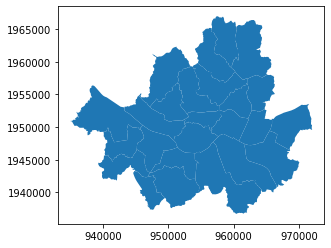

In [11]:
# 서울시 구별 행정구역 시각화
gdf_gu_sl.plot()

In [12]:
# 서울시 학령인구 데이터 로딩 (기간	구분	합계	남자	여자)
import pandas as pd
students = pd.read_csv('/gdrive/My Drive/Colab Notebooks/data/pop__student_seoul.txt', 
                       names=['year', 'gu', 'all', 'male', 'female'], header=1, delimiter='\t', thousands = ',')
students.head()

,year,gu,all,male,female
0,2020,종로구,18393,9245,9148
1,2020,중구,11555,5702,5853
2,2020,용산구,25439,12931,12508
3,2020,성동구,36750,18287,18463
4,2020,광진구,42821,21734,21087


In [13]:
# 서울시 구에 학령인구 속성조인
gdf_students = pd.merge(gdf_gu_sl, students, how='left', left_on='sigungu_nm', right_on='gu')
gdf_students.head()

,base_year,sigungu_cd,sigungu_nm,geometry,do,year,gu,all,male,female
0,2014,11010,종로구,"POLYGON ((953806.750 1959087.750, 953804.657 1...",11,2020,종로구,18393,9245,9148
1,2014,11020,중구,"POLYGON ((957916.250 1952382.242, 957915.313 1...",11,2020,중구,11555,5702,5853
2,2014,11030,용산구,"POLYGON ((953172.117 1950636.875, 953251.096 1...",11,2020,용산구,25439,12931,12508
3,2014,11040,성동구,"POLYGON ((959572.716 1952725.939, 959608.438 1...",11,2020,성동구,36750,18287,18463
4,2014,11050,광진구,"POLYGON ((964822.689 1952650.747, 964827.375 1...",11,2020,광진구,42821,21734,21087


In [0]:
# 서울시 구별 학령인구 단계구분도 시각화를 위한 준비
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
#mpl.rc('font', family=Malgun Gothic) #한글 폰트 - colab에서는 추가 설정 필요

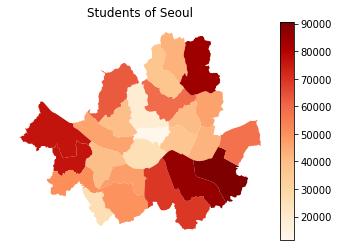

In [15]:
# 서울시 구별 학령인구 단계구분도(Chropleth Map) 시각화
fig, ax = plt.subplots(1, 1)
# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# 시각화
column = 'all'
gdf_students.plot(column, ax=ax, legend=True, cax=cax, cmap='OrRd')

ax.set_title("Students of Seoul")
ax.set_axis_off()
plt.show()

In [16]:
# 공간시각화 관련 모듈 설치
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!pip install contextily  
!pip install geoplot
!pip install folium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (285 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 134485 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3

In [22]:
# 서울시 도시공원 Heatmap 시각화
import folium
from folium import plugins
from folium.plugins import HeatMap

# 전국 도시공원 csv 로딩
df_park = pd.read_csv('/gdrive/My Drive/Colab Notebooks/data/park.csv', index_col=None, 
                      names=['no', 'name', 'type', 'addr1', 'addr2', 'lat', 'lng', 'a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08', 'a09', 'a10', 'a11', 'a12', 'a13'], 
                      usecols=['name', 'addr2', 'lat', 'lng'],
                      header=0, delimiter=',', dtype={'name':object, 'addr2':object, 'lat':float, 'lng':float}, encoding='EUC-KR'    )
df_park.info()
df_park.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 4 columns):
name     18870 non-null object
addr2    17751 non-null object
lat      18870 non-null float64
lng      18870 non-null float64
dtypes: float64(2), object(2)
memory usage: 589.8+ KB


,name,addr2,lat,lng
0,화천 어린이공원1,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075
1,화천 어린이공원3,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868
2,화천 어린이공원4,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736
3,화천 어린이공원8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165
4,사내 어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321


In [23]:
#시군구코드를 문자열 형식으로 변환
#df_park['addr2'] = df_park['addr2'].astype(str)
df_park2 = df_park[df_park['addr2'].str.contains('서울특별시')==True]  
df_park2.head()

,name,addr2,lat,lng
15,창신공원,서울특별시 종로구 창신 23-362,37.578276,127.012931
16,당고개공원,서울특별시 종로구 창신 23-350,37.575762,127.012382
17,무악공원,서울특별시 종로구 무악동 산2-83,37.577525,126.960547
18,창덕공원,서울특별시 종로구 와룡동 2-71,37.580274,126.991785
19,청진공원,서울특별시 종로구 청진동 177,37.571796,126.979991


In [25]:
#서울 도시공원의 좌표를 이용하여 포인트 공간데이터프레임으로 전환
gdf_park = gpd.GeoDataFrame( df_park2, geometry=gpd.points_from_xy(df_park2.lng, df_park2.lat))
gdf_park.head()

,name,addr2,lat,lng,geometry
15,창신공원,서울특별시 종로구 창신 23-362,37.578276,127.012931,POINT (127.01293 37.57828)
16,당고개공원,서울특별시 종로구 창신 23-350,37.575762,127.012382,POINT (127.01238 37.57576)
17,무악공원,서울특별시 종로구 무악동 산2-83,37.577525,126.960547,POINT (126.96055 37.57753)
18,창덕공원,서울특별시 종로구 와룡동 2-71,37.580274,126.991785,POINT (126.99179 37.58027)
19,청진공원,서울특별시 종로구 청진동 177,37.571796,126.979991,POINT (126.97999 37.57180)


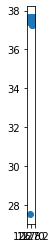

In [26]:
gdf_park.plot()

In [0]:
gdf_park = gdf_park[gdf_park.lat >= 37.4]

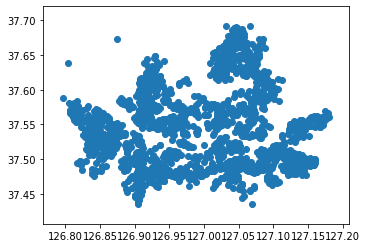

In [32]:
gdf_park.plot()

In [70]:
#Folium을 이용하여 배경지도 위에 서울 도시공원 Heatmap을 시각화

#Folium 배경지도의 중심위치와 레벨, 종류를 설정
map = folium.Map(location=[37.550, 127.0], zoom_start=11, tiles='Stamen Terrain')  #CartoDB positron/ Stamen Terrain/ OpenStreetMap

# Filter the DF for rows, then columns, then remove NaNs
heat_df = gdf_park[['lat', 'lng']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lng'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lng']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data, radius = 15, gradient={.5: 'lime', 1: 'green'}).add_to(map)

#gdf_gu_sl_j  = gdf_gu_sl.to_file("gdf_gu_sl.geojson", driver='GeoJSON')
#folium.GeoJson(gdf_gu_sl).add_to(map)

# Display the map
map

In [80]:
!pip install keplergl
!pip install ipywidgets